In [6]:
diretorio_datasets = "/home/matteus-paula/Downloads/dados_tcc/dados_tratados_remun"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

> ## Dados Remuneração Docentes Muncipio:<br>
- https://www.fnde.gov.br/index.php/fnde_sistemas/siope/relatorios/arquivos-dados-analiticos

In [7]:
remun_docentes = pd.read_csv(f'{diretorio_datasets}/rem_docentes_media_salario.csv', delimiter=";")
remun_docentes.head()

,CO_MUNICIPIO,CO_UF,VL_TOTAL
0,150796,15,1231.68
1,210550,21,1095.79
2,210594,21,1452.22
3,220900,22,1711.82
4,230120,23,700.00


In [8]:
remun_docentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 3 columns):
CO_MUNICIPIO    5359 non-null int64
CO_UF           5359 non-null int64
VL_TOTAL        5359 non-null float64
dtypes: float64(1), int64(2)
memory usage: 125.7 KB


In [9]:
remun_docentes.describe()

,CO_MUNICIPIO,CO_UF,VL_TOTAL
count,5359.000000,5359.000000,5.359000e+03
mean,325923.732973,32.431424,2.796086e+04
std,98134.040976,9.798898,3.682640e+05
min,110001.000000,11.000000,1.720000e+02
25%,251215.000000,25.000000,1.930120e+03
50%,315050.000000,31.000000,2.416090e+03
75%,411985.000000,41.000000,3.014555e+03
max,522220.000000,52.000000,1.622508e+07


In [12]:
remun_docentes.isnull().any()

CO_MUNICIPIO    False
CO_UF           False
VL_TOTAL        False
dtype: bool

In [88]:
remun_docentes = remun_docentes[(remun_docentes.VL_TOTAL < 10000)]
remun_docentes.count()

CO_MUNICIPIO    5252
CO_UF           5252
VL_TOTAL        5252
dtype: int64

In [89]:
remun_docentes.head()

,CO_MUNICIPIO,CO_UF,VL_TOTAL
0,150796,15,1231.68
1,210550,21,1095.79
2,210594,21,1452.22
3,220900,22,1711.82
4,230120,23,700.00


In [90]:
remun_docentes.to_csv(f'{diretorio_datasets}/remuneracao_media_docentes.csv', sep=';', encoding='utf-8', index=False)

<br>

<br>

<br>

In [37]:
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
import numpy as np

In [40]:
array = remun_docentes['VL_TOTAL'].to_numpy()

/home/matteus-paula/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/matteus-paula/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  after removing the cwd from sys.path.


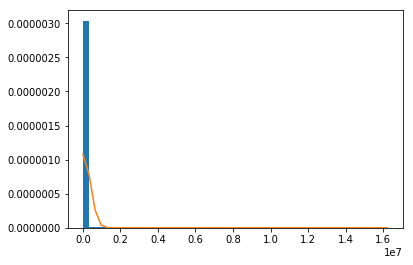

In [41]:
n, bins, patches = plt.hist(array, 50, normed=1)
mu = np.mean(array)
sigma = np.std(array)
plt.plot(bins, mlab.normpdf(bins, mu, sigma))

In [42]:
valor_total = remun_docentes['VL_TOTAL']
z = np.abs(stats.zscore(valor_total))
print(z)

[0.07258836 0.0729574  0.07198944 ... 0.05691501 0.06884146 0.06544695]


In [76]:
threshold = 3
print(np.where(z > 3))

(array([  32,  167,  189,  324,  472,  506,  566,  613, 1005, 1122, 1456,
       1650, 1811, 2209, 2711, 2796, 2918, 2970, 3882, 3919, 4123, 4312,
       4316, 4768, 4814, 4952, 5008, 5039, 5162]),)


In [44]:
z[32]

19.515879884405418

In [52]:
remun_docentes.iloc[189]

5359